### 1. Importing Libraries 


In [1]:
# Importing necessary libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Reading Data

In [4]:
df = pd.read_csv('Restaurant_Reviews.csv')

In [6]:
# Print the first 5 rows of the 'messages' DataFrame
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### 3. Basic EDA

In [9]:
# Generate summary statistics for the 'messages'
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
# Print information about the 'messages' 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
# Describing the reviews after grouping 
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [15]:
# Check for the lengths of the Review texts
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [17]:
# Generate summary statistics for the 'Length' column of the 'messages' DataFrame
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [19]:
# Printing the longest review 
df_149 =df[df['Length'] == 149]['Review']


for message in df_149:
    print(message)


The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


### 4. Data Visualizations

#### Creating a wordcloud with reviews


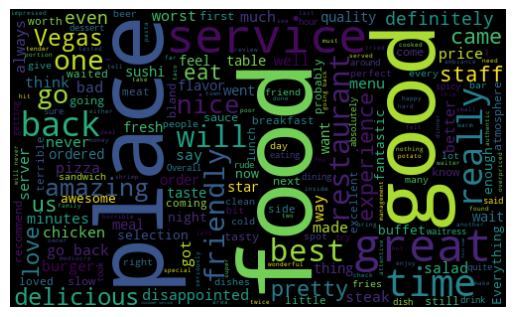

In [23]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['Review'])

# Create a WordCloud object with the desired settings
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)

# Display the WordCloud image
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Countplot

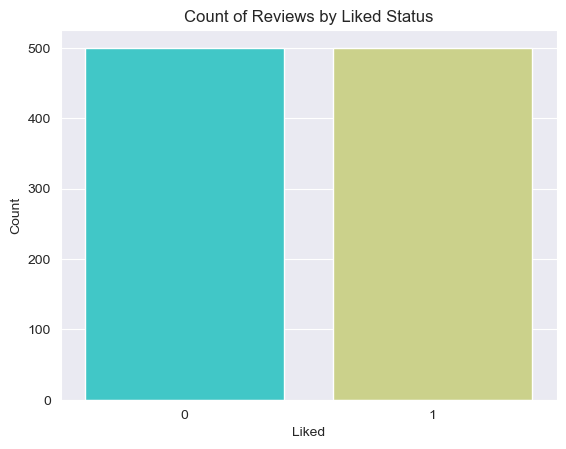

In [52]:
# Set the style of the plot
sns.set_style('darkgrid')

# Create a count plot of the "Liked" column
sns.countplot(x='Liked', data=df, hue='Liked', palette='rainbow', legend=False)

# Set the title of the plot
plt.title('Count of Reviews by Liked Status')

# Set the label for the x-axis
plt.xlabel('Liked')

# Set the label for the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()


#### Histogram

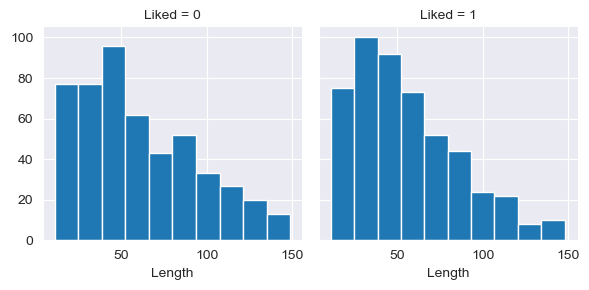

In [29]:
# Create a FacetGrid object with 'Liked' as the column to be used for separating the data
# FacetGrid is a grid of subplots that displays the same relationship between different subsets of your data.
g = sns.FacetGrid(df, col='Liked')

# Use the FacetGrid object to plot a histogram of the 'Length' column for each value of 'Liked'
g.map(plt.hist, 'Length');

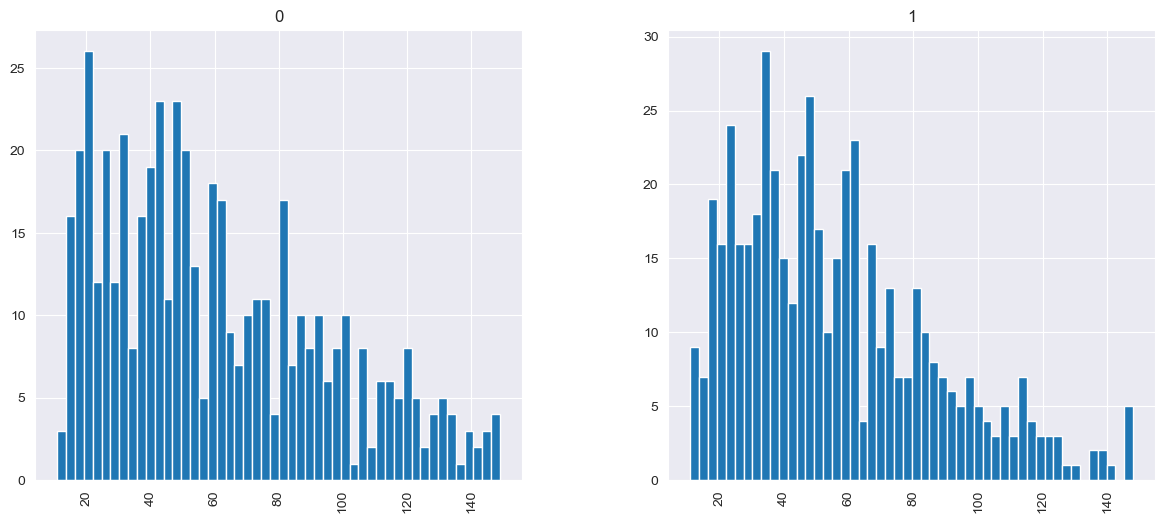

In [30]:
# Comparing length of messages according to category
df.hist(column='Length', by='Liked', bins=50,figsize=(14,6));

In [32]:
# Check for correlation
# Method 1: Only numeric columns
df.corr(numeric_only=True)


,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


#### Correlation - Heatmap

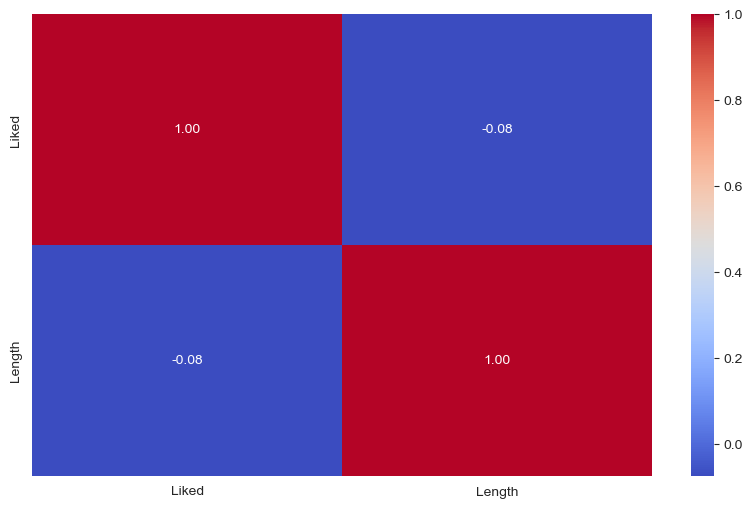

In [36]:
# Select only numeric columns for correlation
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### 5. Data Preprocessing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
X = df['Review']
y = df['Liked']

# Text preprocessing using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# 1. Naive Baye
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# Compare Models

results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print("\nFinal Comparison:")
print(results)

Naive Bayes Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.77      0.78      0.78        96
           1       0.80      0.79      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200

Logistic Regression Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.70      0.86      0.78        96
           1       0.84      0.66      0.74       104

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.78      0.76      0.76       200

Random Forest Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        96
           1       0.86      0.55      0.67       104

    accuracy                           0.72       200
   macro avg       0.76      0.73   

In [42]:
text = ["i hate your cooking"]   # keep inside a list
text_tfidf = tfidf.transform(text) # use the same tfidf used during training

prediction = nb.predict(text_tfidf)
if prediction[0] == 0:
    print(text[0],': ','negative sentiment')
else: 
    print(text[0],': ','positive sentiment')


i hate your cooking :  negative sentiment


In [43]:
text = ["i love you"]   # keep inside a list
text_tfidf = tfidf.transform(text) # use the same tfidf used during training

prediction = nb.predict(text_tfidf)
if prediction[0] == 0:
    print(text[0],': ','negative sentiment')
else: 
    print(text[0],': ','positive sentiment')

i love you :  positive sentiment
